In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:42:39,018 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:39,019 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:39,020 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:39,022 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:42:39,022 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:39,040 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:42:39,483 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:39,490 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:39,491 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:39,492 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:39,492 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:39,493 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:39,493 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:39,494 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:39,943 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:42:40,128 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:40,128 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:40,129 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:40,131 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:40,709 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 4
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136099807093, 864691135113167769, 864691135589906955,
       864691136370815112, 864691135645592260])


--- Working on Neuron 864691136099807093 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 27, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 4817, # error synapses  = 2, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 4846
n_valid_syn_ids_presyn = 27
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 4817
n_errored_syn_ids_postsyn = 2
Segment Id = 864691136099807093
Postsyn counts:
TP:4805
TN:0
FP:12
FN:2
Presyn counts:
TP:15
TN:0
FP:12
FN:0


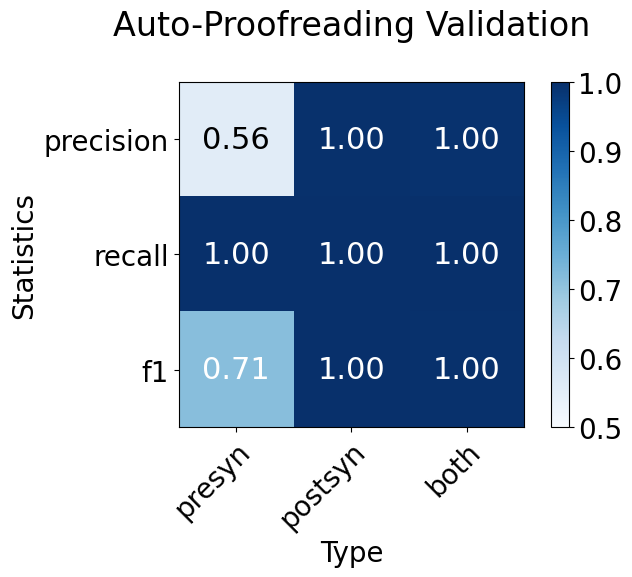

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136099807093_validation_df.pbz2
File size is 0.097317 MB
Total time for neuron 864691136099807093: 58.10681223869324

--- Working on Neuron 864691135113167769 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 207, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2255, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 2462
n_valid_syn_ids_presyn = 207
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2255
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135113167769
Postsyn counts:
TP:2241
TN:0
FP:14
FN:0
Presyn counts:
TP:24
TN:0
FP:183
FN:0


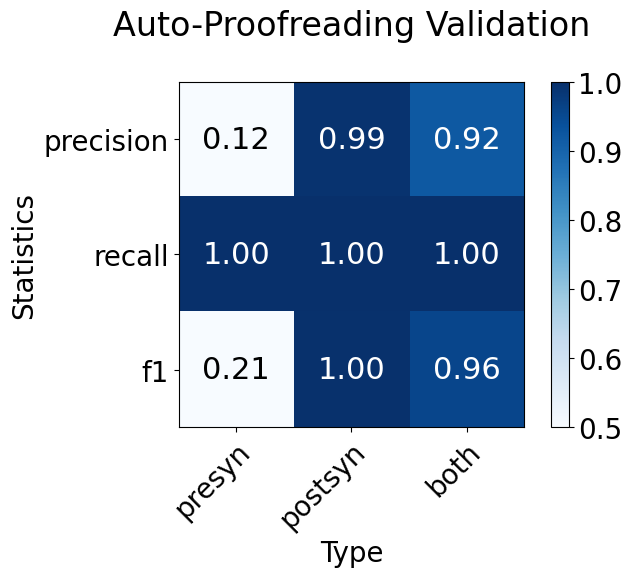

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135113167769_validation_df.pbz2
File size is 0.049768 MB
Total time for neuron 864691135113167769: 76.54571342468262

--- Working on Neuron 864691135589906955 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 391, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 5855, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 6246
n_valid_syn_ids_presyn = 391
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 5855
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135589906955
Postsyn counts:
TP:5825
TN:0
FP:30
FN:0
Presyn counts:
TP:45
TN:0
FP:346
FN:0


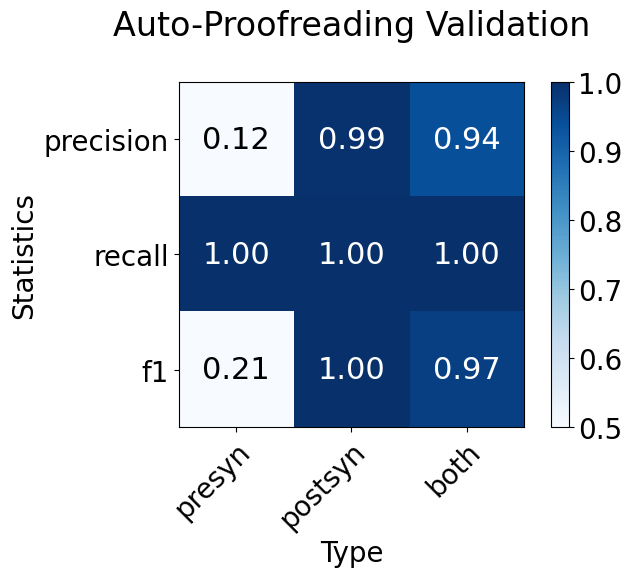

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135589906955_validation_df.pbz2
File size is 0.12454 MB
Total time for neuron 864691135589906955: 158.22388815879822

--- Working on Neuron 864691136370815112 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 34, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 3956, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 34
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 3956
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136370815112
Postsyn counts:
TP:3956
TN:0
FP:0
FN:0
Presyn counts:
TP:27
TN:0
FP:7
FN:0


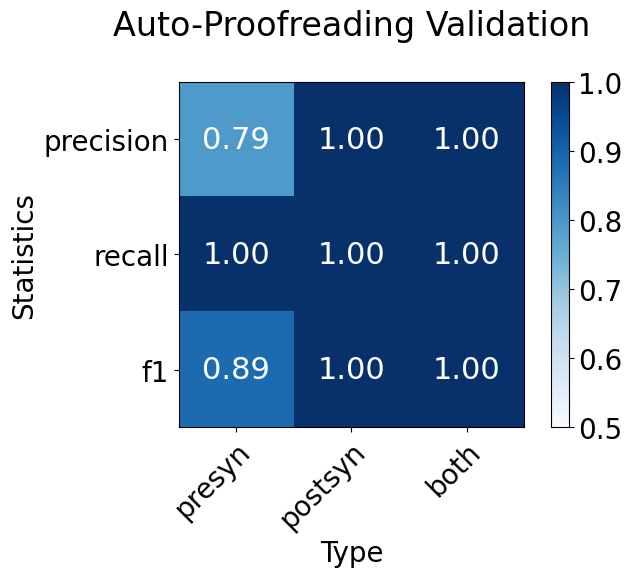

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136370815112_validation_df.pbz2
File size is 0.080894 MB
Total time for neuron 864691136370815112: 79.76040244102478

--- Working on Neuron 864691135645592260 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 159, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 3143, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 3302
n_valid_syn_ids_presyn = 159
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 3143
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135645592260
Postsyn counts:
TP:3141
TN:0
FP:2
FN:0
Presyn counts:
TP:40
TN:0
FP:119
FN:0


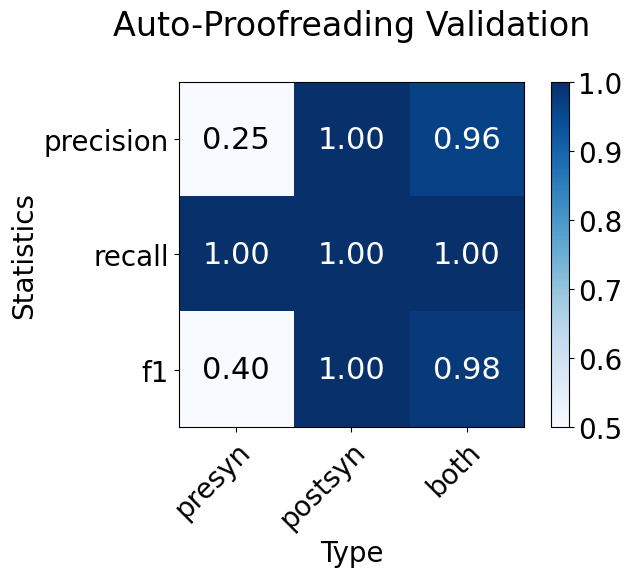

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135645592260_validation_df.pbz2
File size is 0.067469 MB
Total time for neuron 864691135645592260: 82.06962966918945


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")